# Classification of SVHN using Deep Neural Networks.

## Steps in Image Classification Pipeline using Deep Neural Networks

1.Load the image and label dataset and split them into train ,test and validation datasets.

2.Preprocessing input data:Such as normalizing Image output, resizing images if needed, data autmentation techniques to create more samples(for sparse data),creating labels for categorical data,etc.

3.Creating the sequential Deep Learning model and choosing the right activation methods,input nuerons and output neurons ,etc

4.Compiling the model with right loss function.

5.Training the model on train and validation data sets.

6.Fine tuning it using various techniques such as adding drop outs or batch normalization layers,cross-validation(for sparse data),etc.

7.Evaluate the test dataset using the best final model and creating metrics (such as confusion metrics and classification reports)to guage model performance.

8.Making predictions on unseen data and evaluate model performance on unseen data.

## Importing Keras Modules


In [1]:
#Importing important modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


## 1. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 

## 2.Data Fetching and understand the train/test splits

### Loading the Dataset

<h3>Load SVHN dataset from a h5 file</h3>

In [2]:
import h5py
import numpy as np

h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training and test set
x_train_full=h5f['X_train'][:]
y_train_full = h5f['y_train'][:]

x_test_full = h5f['X_test'][:]
y_test_full = h5f['y_test'][:]

# Close this file
h5f.close()


### Create Train Set-30000 records

In [3]:
x_train = x_train_full[0:30000]
y_train = y_train_full[0:30000]

### Create Validation Set-12000 records

In [4]:
x_val = x_train_full[30000:]
y_val = y_train_full[30000:]

### Create Test set-17900 records

In [5]:
x_test = x_test_full[0:17900]
y_test = y_test_full[0:17900]

### Create Prediction Set-100 records

In [6]:
x_pred = x_test_full[17900:]
y_pred = y_test_full[17900:]

### Preserve Labels and Images for precitions

In [7]:
pred_image=x_pred
print(pred_image.shape)

(100, 32, 32)


In [8]:
y_pred_labels=y_pred
y_test_labels=y_test
y_train_labels=y_train

### Total Samples in all image datasets

In [9]:
print('Total Validation Samples:->',x_val.shape)
print('Total Train      Samples:->',x_train.shape)
print('Total Prediction Samples:->',x_pred.shape)
print('Total Test       Samples:->',x_test.shape)

Total Validation Samples:-> (12000, 32, 32)
Total Train      Samples:-> (30000, 32, 32)
Total Prediction Samples:-> (100, 32, 32)
Total Test       Samples:-> (17900, 32, 32)


### Total number of samples in all Label datasets

In [10]:
print('Total Validation Labels:->',y_val.shape)
print('Total Train      Labels:->',y_train.shape)
print('Total Prediction Labels:->',y_pred.shape)
print('Total Test       Labels:->',y_test.shape)

Total Validation Labels:-> (12000,)
Total Train      Labels:-> (30000,)
Total Prediction Labels:-> (100,)
Total Test       Labels:-> (17900,)


### Visualizing the prediction dataset

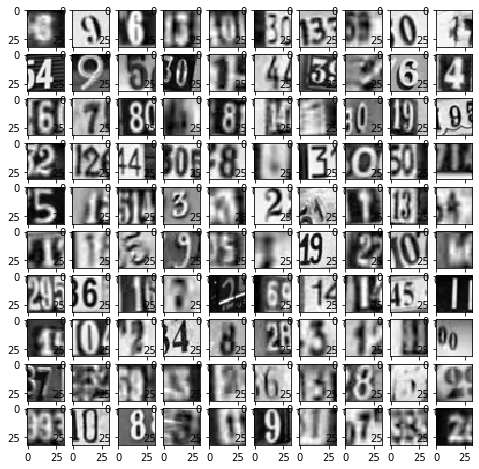

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_pred[i-1]
    fig.add_subplot(rows, columns,i)
    plt.imshow(img, cmap='gray')
#    print(y_pred[i-1])
plt.show()

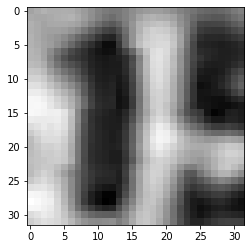

In [12]:
plt.imshow(x_pred[14], cmap='gray')


In [13]:
x_pred[14].shape

(32, 32)

### Computing Image Size

In [14]:
image_size=x_train.shape[1]

In [15]:
input_size=image_size * image_size

In [16]:
print(input_size)

1024


### Reshape and Normalize inputs for Deep Learning models


### Pre-processing the dataset-Normalizing the input

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_pred = x_pred.astype('float32')
#Normalizing the input
x_train /= 255
x_test /= 255
x_val /= 255
x_pred /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')
print(x_pred.shape[0], 'pred samples')

30000 train samples
17900 test samples
12000 validation samples
100 pred samples


In [18]:
print(x_train.dtype)
print(x_test.dtype)
print(x_val.dtype)
print(x_pred.dtype)

float32
float32
float32
float32


### Computing target prediction classes

In [19]:
num_classes=len(np.unique(y_train))

In [20]:
len(np.unique(y_val))

10

In [21]:
print(num_classes)

10


### Convert Labels from digits to one hot vectors

In [22]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)                                  

In [23]:
print(y_train[0])
print(y_test[0])
print(y_val[0])


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [24]:
x_train=np.reshape(x_train,[-1,input_size])
x_test=np.reshape(x_test,[-1,input_size])
x_val=np.reshape(x_val,[-1,input_size])
x_pred=np.reshape(x_pred,[-1,input_size])

### Final Shape of input and labels

In [25]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(x_pred.shape)

(30000, 1024)
(17900, 1024)
(12000, 1024)
(100, 1024)


In [26]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
print(y_pred.shape)

(30000, 10)
(17900, 10)
(12000, 10)
(100,)


## 3.Implement and apply a Deep Neural Network classifier

### Building Deep Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#### Model-1-Vanillla Deep Neural Network-With Relu activation

In [28]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=input_size))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [31]:
optimizer = Adam(lr=0.0001,beta_1=0.9)
model.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_list = [reduce_lr]

In [32]:
history = model.fit(x_train, y_train, batch_size=512,
         epochs=250,validation_data=(x_val, y_val), callbacks=callback_list,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 4s 123us/step - loss: 2.2790 - accuracy: 0.1550 - val_loss: 2.2344 - val_accuracy: 0.2836
Epoch 2/250
30000/30000 [==============================] - 3s 84us/step - loss: 2.1368 - accuracy: 0.3319 - val_loss: 1.9933 - val_accuracy: 0.3978
Epoch 3/250
30000/30000 [==============================] - 2s 81us/step - loss: 1.8200 - accuracy: 0.4579 - val_loss: 1.6449 - val_accuracy: 0.5228
Epoch 4/250
30000/30000 [==============================] - 3s 85us/step - loss: 1.5377 - accuracy: 0.5479 - val_loss: 1.4562 - val_accuracy: 0.5624
Epoch 5/250
30000/30000 [==============================] - 3s 84us/step - loss: 1.3678 - accuracy: 0.5989 - val_loss: 1.3089 - val_accuracy: 0.6265
Epoch 6/250
30000/30000 [==============================] - 3s 84us/step - loss: 1.2553 - accuracy: 0.6304 - val_loss: 1.2280 - val_accuracy: 0.6395
Epoch 7/250
30000/30000 [==============================] - 3s

Epoch 56/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.4845 - accuracy: 0.8548 - val_loss: 0.6452 - val_accuracy: 0.8112
Epoch 57/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.4830 - accuracy: 0.8565 - val_loss: 0.6345 - val_accuracy: 0.8144
Epoch 58/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.4749 - accuracy: 0.8579 - val_loss: 0.6244 - val_accuracy: 0.8148
Epoch 59/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.4638 - accuracy: 0.8636 - val_loss: 0.6137 - val_accuracy: 0.8226
Epoch 60/250
30000/30000 [==============================] - 3s 88us/step - loss: 0.4576 - accuracy: 0.8655 - val_loss: 0.6157 - val_accuracy: 0.8201
Epoch 61/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.4544 - accuracy: 0.8656 - val_loss: 0.6068 - val_accuracy: 0.8237
Epoch 62/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.4539 - accuracy: 0.8656

Epoch 111/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.2780 - accuracy: 0.9184 - val_loss: 0.5986 - val_accuracy: 0.8338
Epoch 112/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.2764 - accuracy: 0.9182 - val_loss: 0.6140 - val_accuracy: 0.8346
Epoch 113/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.2774 - accuracy: 0.9192 - val_loss: 0.6000 - val_accuracy: 0.8360
Epoch 114/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.2674 - accuracy: 0.9223 - val_loss: 0.5937 - val_accuracy: 0.8388
Epoch 115/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.2665 - accuracy: 0.9220 - val_loss: 0.5957 - val_accuracy: 0.8395
Epoch 116/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.2684 - accuracy: 0.9199 - val_loss: 0.5903 - val_accuracy: 0.8394
Epoch 117/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.2595 - accuracy:

30000/30000 [==============================] - 3s 84us/step - loss: 0.1618 - accuracy: 0.9553 - val_loss: 0.6436 - val_accuracy: 0.8410
Epoch 166/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1623 - accuracy: 0.9554 - val_loss: 0.6386 - val_accuracy: 0.8418
Epoch 167/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1628 - accuracy: 0.9544 - val_loss: 0.6525 - val_accuracy: 0.8406
Epoch 168/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.1537 - accuracy: 0.9591 - val_loss: 0.6509 - val_accuracy: 0.8398
Epoch 169/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1481 - accuracy: 0.9608 - val_loss: 0.6407 - val_accuracy: 0.8422
Epoch 170/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1559 - accuracy: 0.9571 - val_loss: 0.6763 - val_accuracy: 0.8360
Epoch 171/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1526 - accuracy: 0.9580 - val_

Epoch 220/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.0860 - accuracy: 0.9795 - val_loss: 0.7323 - val_accuracy: 0.8385
Epoch 221/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.0964 - accuracy: 0.9747 - val_loss: 0.7453 - val_accuracy: 0.8333
Epoch 222/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.0886 - accuracy: 0.9783 - val_loss: 0.7159 - val_accuracy: 0.8439
Epoch 223/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.0868 - accuracy: 0.9793 - val_loss: 0.7344 - val_accuracy: 0.8381
Epoch 224/250
30000/30000 [==============================] - 2s 83us/step - loss: 0.0945 - accuracy: 0.9745 - val_loss: 0.7365 - val_accuracy: 0.8407
Epoch 225/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.0899 - accuracy: 0.9781 - val_loss: 0.7258 - val_accuracy: 0.8439
Epoch 226/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.0825 - accuracy:

In [33]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8388268351554871


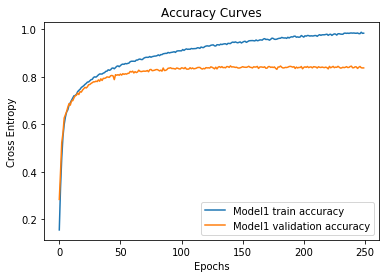

In [34]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['accuracy'],label='Model1 train accuracy')
plt.plot(history.history['val_accuracy'],label='Model1 validation accuracy')
plt.legend()
plt.show()

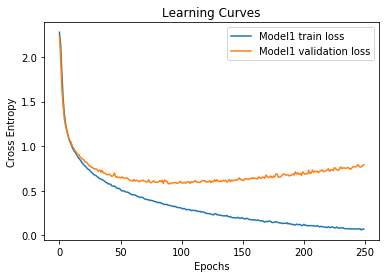

In [35]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['loss'],label='Model1 train loss')
plt.plot(history.history['val_loss'],label='Model1 validation loss')
plt.legend()
plt.show()

#### Model-2-Vanillla Deep Neural Network-With elu activation

In [36]:
modele = Sequential()
modele.add(Dense(512, activation='elu', input_dim=input_size))
modele.add(Dense(512, activation='elu'))
modele.add(Dense(512, activation='elu'))
modele.add(Dense(num_classes, activation='softmax'))

In [37]:
modele.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________


In [38]:
optimizer = Adam(lr=0.0001,beta_1=0.9)
modele.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_liste = [reduce_lr]

In [39]:
historye = modele.fit(x_train, y_train, batch_size=512,
         epochs=250,validation_data=(x_val, y_val), callbacks=callback_liste,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 3s 117us/step - loss: 2.3173 - accuracy: 0.1143 - val_loss: 2.2895 - val_accuracy: 0.1382
Epoch 2/250
30000/30000 [==============================] - 3s 84us/step - loss: 2.2822 - accuracy: 0.1473 - val_loss: 2.2721 - val_accuracy: 0.1734
Epoch 3/250
30000/30000 [==============================] - 3s 86us/step - loss: 2.2544 - accuracy: 0.1822 - val_loss: 2.2482 - val_accuracy: 0.1912
Epoch 4/250
30000/30000 [==============================] - 3s 86us/step - loss: 2.2158 - accuracy: 0.2117 - val_loss: 2.1825 - val_accuracy: 0.2503
Epoch 5/250
30000/30000 [==============================] - 2s 82us/step - loss: 2.1315 - accuracy: 0.2763 - val_loss: 2.0740 - val_accuracy: 0.3024
Epoch 6/250
30000/30000 [==============================] - 2s 81us/step - loss: 1.9754 - accuracy: 0.3544 - val_loss: 1.8709 - val_accuracy: 0.4084
Epoch 7/250
30000/30000 [==============================] - 3s

Epoch 56/250
30000/30000 [==============================] - 2s 82us/step - loss: 0.6549 - accuracy: 0.8031 - val_loss: 0.7309 - val_accuracy: 0.7837
Epoch 57/250
30000/30000 [==============================] - 2s 82us/step - loss: 0.6447 - accuracy: 0.8072 - val_loss: 0.7412 - val_accuracy: 0.7844
Epoch 58/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.6414 - accuracy: 0.8078 - val_loss: 0.7210 - val_accuracy: 0.7843
Epoch 59/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.6392 - accuracy: 0.8096 - val_loss: 0.7285 - val_accuracy: 0.7829
Epoch 60/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.6279 - accuracy: 0.8120 - val_loss: 0.7114 - val_accuracy: 0.7887
Epoch 61/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.6232 - accuracy: 0.8148 - val_loss: 0.7016 - val_accuracy: 0.7933
Epoch 62/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.6183 - accuracy: 0.8166

Epoch 111/250
30000/30000 [==============================] - 3s 87us/step - loss: 0.4199 - accuracy: 0.8722 - val_loss: 0.5926 - val_accuracy: 0.8292
Epoch 112/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.4111 - accuracy: 0.8776 - val_loss: 0.5963 - val_accuracy: 0.8306
Epoch 113/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.4076 - accuracy: 0.8788 - val_loss: 0.5996 - val_accuracy: 0.8296
Epoch 114/250
30000/30000 [==============================] - 3s 87us/step - loss: 0.4098 - accuracy: 0.8769 - val_loss: 0.5951 - val_accuracy: 0.8307
Epoch 115/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.4025 - accuracy: 0.8794 - val_loss: 0.5968 - val_accuracy: 0.8304
Epoch 116/250
30000/30000 [==============================] - 3s 88us/step - loss: 0.4015 - accuracy: 0.8804 - val_loss: 0.5988 - val_accuracy: 0.8315
Epoch 117/250
30000/30000 [==============================] - 3s 84us/step - loss: 0.4006 - accuracy:

30000/30000 [==============================] - 3s 86us/step - loss: 0.2776 - accuracy: 0.9176 - val_loss: 0.5925 - val_accuracy: 0.8393
Epoch 166/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.2736 - accuracy: 0.9190 - val_loss: 0.5912 - val_accuracy: 0.8387
Epoch 167/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.2741 - accuracy: 0.9172 - val_loss: 0.5908 - val_accuracy: 0.8422
Epoch 168/250
30000/30000 [==============================] - 3s 85us/step - loss: 0.2683 - accuracy: 0.9200 - val_loss: 0.5828 - val_accuracy: 0.8416
Epoch 169/250
30000/30000 [==============================] - 2s 79us/step - loss: 0.2659 - accuracy: 0.9210 - val_loss: 0.5878 - val_accuracy: 0.8418
Epoch 170/250
30000/30000 [==============================] - 2s 80us/step - loss: 0.2673 - accuracy: 0.9215 - val_loss: 0.5959 - val_accuracy: 0.8402
Epoch 171/250
30000/30000 [==============================] - 2s 81us/step - loss: 0.2662 - accuracy: 0.9196 - val_

Epoch 220/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1728 - accuracy: 0.9521 - val_loss: 0.6246 - val_accuracy: 0.8435
Epoch 221/250
30000/30000 [==============================] - 3s 87us/step - loss: 0.1718 - accuracy: 0.9523 - val_loss: 0.6291 - val_accuracy: 0.8435
Epoch 222/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1728 - accuracy: 0.9510 - val_loss: 0.6393 - val_accuracy: 0.8394
Epoch 223/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1756 - accuracy: 0.9503 - val_loss: 0.6386 - val_accuracy: 0.8403
Epoch 224/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1719 - accuracy: 0.9508 - val_loss: 0.6320 - val_accuracy: 0.8408
Epoch 225/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1690 - accuracy: 0.9533 - val_loss: 0.6319 - val_accuracy: 0.8415
Epoch 226/250
30000/30000 [==============================] - 3s 86us/step - loss: 0.1706 - accuracy:

In [40]:
test_losse, test_acce = modele.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acce)


Test accuracy: 0.8492178916931152


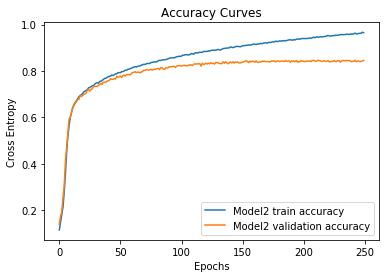

In [41]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historye.history['accuracy'],label='Model2 train accuracy')
plt.plot(historye.history['val_accuracy'],label='Model2 validation accuracy')
plt.legend()
plt.show()

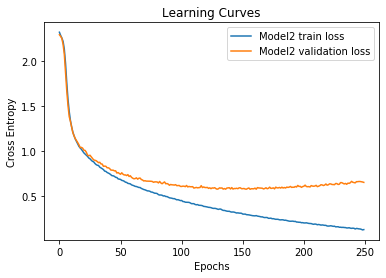

In [42]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historye.history['loss'],label='Model2 train loss')
plt.plot(historye.history['val_loss'],label='Model2 validation loss')
plt.legend()
plt.show()

#### Model-3-Generalized Deep Neural Network-With relu activation and Dropouts

In [43]:
modeld = Sequential()
modeld.add(Dense(512, activation='relu', input_dim=input_size))
modeld.add(Dropout(0.10))
modeld.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
modeld.add(Dropout(0.15))
modeld.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
modeld.add(Dropout(0.15))
modeld.add(Dense(num_classes, activation='softmax'))

In [44]:
modeld.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [45]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.0001)
modeld.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_listd = [reduce_lr]

In [46]:
historyd=modeld.fit(x_train, y_train,
          batch_size=512,
          epochs=250,validation_data=(x_val, y_val), callbacks=callback_listd,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 5s 150us/step - loss: 2.3151 - accuracy: 0.1203 - val_loss: 2.2570 - val_accuracy: 0.2088
Epoch 2/250
30000/30000 [==============================] - 3s 100us/step - loss: 2.2334 - accuracy: 0.2035 - val_loss: 2.1465 - val_accuracy: 0.3382
Epoch 3/250
30000/30000 [==============================] - 3s 100us/step - loss: 2.0720 - accuracy: 0.3191 - val_loss: 1.8763 - val_accuracy: 0.4458
Epoch 4/250
30000/30000 [==============================] - 3s 101us/step - loss: 1.8066 - accuracy: 0.4200 - val_loss: 1.5772 - val_accuracy: 0.5527
Epoch 5/250
30000/30000 [==============================] - 3s 101us/step - loss: 1.5706 - accuracy: 0.5069 - val_loss: 1.3929 - val_accuracy: 0.5995
Epoch 6/250
30000/30000 [==============================] - 3s 99us/step - loss: 1.4054 - accuracy: 0.5618 - val_loss: 1.2681 - val_accuracy: 0.6317
Epoch 7/250
30000/30000 [==============================] 

30000/30000 [==============================] - 3s 98us/step - loss: 0.5519 - accuracy: 0.8308 - val_loss: 0.6165 - val_accuracy: 0.8155
Epoch 56/250
30000/30000 [==============================] - 3s 96us/step - loss: 0.5551 - accuracy: 0.8294 - val_loss: 0.6156 - val_accuracy: 0.8198
Epoch 57/250
30000/30000 [==============================] - 3s 97us/step - loss: 0.5487 - accuracy: 0.8324 - val_loss: 0.6022 - val_accuracy: 0.8217
Epoch 58/250
30000/30000 [==============================] - 3s 95us/step - loss: 0.5365 - accuracy: 0.8369 - val_loss: 0.5942 - val_accuracy: 0.8241
Epoch 59/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.5300 - accuracy: 0.8398 - val_loss: 0.5962 - val_accuracy: 0.8253
Epoch 60/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.5287 - accuracy: 0.8382 - val_loss: 0.5957 - val_accuracy: 0.8249
Epoch 61/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.5315 - accuracy: 0.8366 - val_loss: 

Epoch 110/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.3648 - accuracy: 0.8847 - val_loss: 0.5466 - val_accuracy: 0.8418
Epoch 111/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.3629 - accuracy: 0.8854 - val_loss: 0.5414 - val_accuracy: 0.8451
Epoch 112/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.3616 - accuracy: 0.8856 - val_loss: 0.5416 - val_accuracy: 0.8462
Epoch 113/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.3608 - accuracy: 0.8871 - val_loss: 0.5448 - val_accuracy: 0.8435
Epoch 114/250
30000/30000 [==============================] - 3s 97us/step - loss: 0.3534 - accuracy: 0.8880 - val_loss: 0.5472 - val_accuracy: 0.8438
Epoch 115/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.3488 - accuracy: 0.8919 - val_loss: 0.5410 - val_accuracy: 0.8474
Epoch 116/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.3530 - accura

30000/30000 [==============================] - 3s 93us/step - loss: 0.2663 - accuracy: 0.9143 - val_loss: 0.5517 - val_accuracy: 0.8528
Epoch 165/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.2627 - accuracy: 0.9162 - val_loss: 0.5419 - val_accuracy: 0.8529
Epoch 166/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.2593 - accuracy: 0.9165 - val_loss: 0.5525 - val_accuracy: 0.8497
Epoch 167/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.2571 - accuracy: 0.9168 - val_loss: 0.5333 - val_accuracy: 0.8556
Epoch 168/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.2543 - accuracy: 0.9188 - val_loss: 0.5525 - val_accuracy: 0.8492
Epoch 169/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.2523 - accuracy: 0.9183 - val_loss: 0.5525 - val_accuracy: 0.8547
Epoch 170/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.2509 - accuracy: 0.9189 - v

Epoch 219/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.1916 - accuracy: 0.9372 - val_loss: 0.5638 - val_accuracy: 0.8545
Epoch 220/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.1880 - accuracy: 0.9386 - val_loss: 0.5782 - val_accuracy: 0.8546
Epoch 221/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.1872 - accuracy: 0.9395 - val_loss: 0.5860 - val_accuracy: 0.8528
Epoch 222/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.1894 - accuracy: 0.9395 - val_loss: 0.5803 - val_accuracy: 0.8546
Epoch 223/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.1848 - accuracy: 0.9394 - val_loss: 0.5765 - val_accuracy: 0.8553
Epoch 224/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.1933 - accuracy: 0.9364 - val_loss: 0.5839 - val_accuracy: 0.8534
Epoch 225/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.1848 - acc

In [47]:
test_lossd, test_accd = modeld.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accd)


Test accuracy: 0.8565921783447266


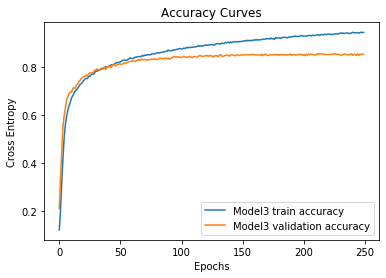

In [48]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historyd.history['accuracy'],label='Model3 train accuracy')
plt.plot(historyd.history['val_accuracy'],label='Model3 validation accuracy')
plt.legend()
plt.show()

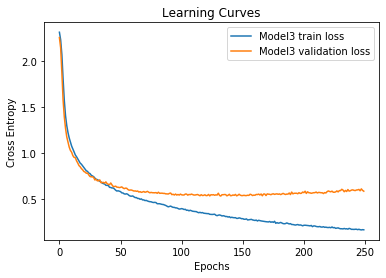

In [49]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historyd.history['loss'],label='Model3 train loss')
plt.plot(historyd.history['val_loss'],label='Model3 validation loss')
plt.legend()
plt.show()

#### Model-4-Generalized Deep Neural Network-With elu activation and Dropouts

In [50]:
modelde = Sequential()
modelde.add(Dense(512, activation='elu', input_dim=input_size))
modelde.add(Dropout(0.10))
modelde.add(Dense(512, activation='elu',kernel_initializer='he_normal'))
modelde.add(Dropout(0.15))
modelde.add(Dense(512, activation='elu',kernel_initializer='he_normal'))
modelde.add(Dropout(0.15))
modelde.add(Dense(num_classes, activation='softmax'))

In [51]:
modelde.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [52]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.0001)
modelde.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_listde = [reduce_lr]

In [53]:
historyde=modelde.fit(x_train, y_train,
          batch_size=512,
          epochs=250,validation_data=(x_val, y_val), callbacks=callback_listde,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 4s 146us/step - loss: 2.4109 - accuracy: 0.1098 - val_loss: 2.2857 - val_accuracy: 0.1405
Epoch 2/250
30000/30000 [==============================] - 3s 100us/step - loss: 2.3124 - accuracy: 0.1366 - val_loss: 2.2502 - val_accuracy: 0.1784
Epoch 3/250
30000/30000 [==============================] - 3s 100us/step - loss: 2.2578 - accuracy: 0.1677 - val_loss: 2.1860 - val_accuracy: 0.2520
Epoch 4/250
30000/30000 [==============================] - 3s 100us/step - loss: 2.1727 - accuracy: 0.2251 - val_loss: 2.0877 - val_accuracy: 0.2921
Epoch 5/250
30000/30000 [==============================] - 3s 98us/step - loss: 2.0439 - accuracy: 0.2891 - val_loss: 1.9015 - val_accuracy: 0.3877
Epoch 6/250
30000/30000 [==============================] - 3s 100us/step - loss: 1.8637 - accuracy: 0.3676 - val_loss: 1.6908 - val_accuracy: 0.4905
Epoch 7/250
30000/30000 [==============================] 

30000/30000 [==============================] - 3s 101us/step - loss: 0.7003 - accuracy: 0.7901 - val_loss: 0.6943 - val_accuracy: 0.7982
Epoch 56/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.7041 - accuracy: 0.7832 - val_loss: 0.6968 - val_accuracy: 0.7971
Epoch 57/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.6948 - accuracy: 0.7909 - val_loss: 0.6883 - val_accuracy: 0.7979
Epoch 58/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.6873 - accuracy: 0.7935 - val_loss: 0.6866 - val_accuracy: 0.7970
Epoch 59/250
30000/30000 [==============================] - 3s 102us/step - loss: 0.6867 - accuracy: 0.7911 - val_loss: 0.6721 - val_accuracy: 0.8028
Epoch 60/250
30000/30000 [==============================] - 3s 101us/step - loss: 0.6828 - accuracy: 0.7942 - val_loss: 0.6718 - val_accuracy: 0.8029
Epoch 61/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.6736 - accuracy: 0.7953 - val

Epoch 110/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.4984 - accuracy: 0.8476 - val_loss: 0.5503 - val_accuracy: 0.8447
Epoch 111/250
30000/30000 [==============================] - 3s 101us/step - loss: 0.4931 - accuracy: 0.8510 - val_loss: 0.5614 - val_accuracy: 0.8401
Epoch 112/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.4943 - accuracy: 0.8476 - val_loss: 0.5618 - val_accuracy: 0.8417
Epoch 113/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.4878 - accuracy: 0.8512 - val_loss: 0.5520 - val_accuracy: 0.8436
Epoch 114/250
30000/30000 [==============================] - 3s 101us/step - loss: 0.4922 - accuracy: 0.8511 - val_loss: 0.5546 - val_accuracy: 0.8417
Epoch 115/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.4847 - accuracy: 0.8528 - val_loss: 0.5570 - val_accuracy: 0.8427
Epoch 116/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.4865 - ac

30000/30000 [==============================] - 3s 100us/step - loss: 0.3990 - accuracy: 0.8751 - val_loss: 0.5297 - val_accuracy: 0.8558
Epoch 165/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.4029 - accuracy: 0.8733 - val_loss: 0.5321 - val_accuracy: 0.8543
Epoch 166/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.4054 - accuracy: 0.8734 - val_loss: 0.5275 - val_accuracy: 0.8555
Epoch 167/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.3970 - accuracy: 0.8753 - val_loss: 0.5291 - val_accuracy: 0.8525
Epoch 168/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.3957 - accuracy: 0.8762 - val_loss: 0.5222 - val_accuracy: 0.8533
Epoch 169/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.3979 - accuracy: 0.8758 - val_loss: 0.5197 - val_accuracy: 0.8568
Epoch 170/250
30000/30000 [==============================] - 3s 101us/step - loss: 0.3925 - accuracy: 0.8776 

30000/30000 [==============================] - 3s 99us/step - loss: 0.3336 - accuracy: 0.8945 - val_loss: 0.5250 - val_accuracy: 0.8584
Epoch 219/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.3301 - accuracy: 0.8938 - val_loss: 0.5201 - val_accuracy: 0.8606
Epoch 220/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.3294 - accuracy: 0.8961 - val_loss: 0.5172 - val_accuracy: 0.8624
Epoch 221/250
30000/30000 [==============================] - 3s 100us/step - loss: 0.3259 - accuracy: 0.8938 - val_loss: 0.5197 - val_accuracy: 0.8614
Epoch 222/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.3347 - accuracy: 0.8934 - val_loss: 0.5148 - val_accuracy: 0.8621
Epoch 223/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.3261 - accuracy: 0.8962 - val_loss: 0.5178 - val_accuracy: 0.8632
Epoch 224/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.3247 - accuracy: 0.8976 - val

In [54]:
test_lossde, test_accde = modelde.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accde)


Test accuracy: 0.8634078502655029


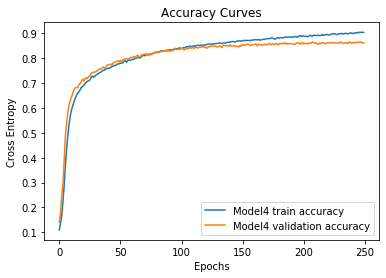

In [55]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historyde.history['accuracy'],label='Model4 train accuracy')
plt.plot(historyde.history['val_accuracy'],label='Model4 validation accuracy')
plt.legend()
plt.show()

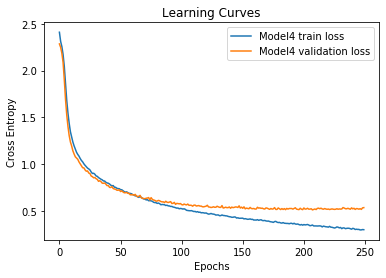

In [56]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historyde.history['loss'],label='Model4 train loss')
plt.plot(historyde.history['val_loss'],label='Model4 validation loss')
plt.legend()
plt.show()

### Model Comparision

### Comparing Train Accuracies

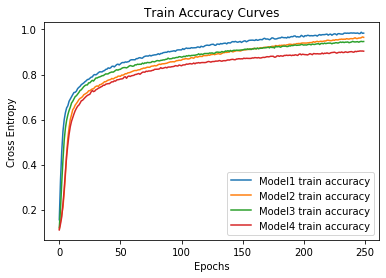

In [57]:
plt.title("Train Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['accuracy'],label='Model1 train accuracy')
plt.plot(historye.history['accuracy'],label='Model2 train accuracy')
plt.plot(historyd.history['accuracy'],label='Model3 train accuracy')
plt.plot(historyde.history['accuracy'],label='Model4 train accuracy')
plt.legend()
plt.show()

#### Comparing Validation Accuracies

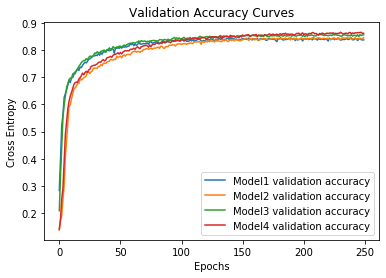

In [58]:
plt.title("Validation Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['val_accuracy'],label='Model1 validation accuracy')
plt.plot(historye.history['val_accuracy'],label='Model2 validation accuracy')
plt.plot(historyd.history['val_accuracy'],label='Model3 validation accuracy')
plt.plot(historyde.history['val_accuracy'],label='Model4 validation accuracy')
plt.legend()
plt.show()

### It can be seen that the plain Neural Networks Model 1 overfits more and under performs. The best model is Model4 that is the generalized model with ELU activation. It can be observed that ELU activation performs slightly better than RELU on the same architechture.Also Model4 has the lowest loss.

## 4. Implement batch normalization for training the neural network

#### Model5-Deep Neural Networks with Batch Normalization and Relu Activation

In [59]:
from keras.layers import BatchNormalization

In [60]:
modelb = Sequential()
modelb.add(Dense(512, activation='relu', input_dim=input_size))
modelb.add(BatchNormalization(momentum=0.0))
modelb.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
modelb.add(BatchNormalization(momentum=0.0))
modelb.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
modelb.add(BatchNormalization(momentum=0.0))
modelb.add(Dense(num_classes, activation='softmax'))

In [61]:
modelb.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [62]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.0001)
modelb.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_listb = [reduce_lr]

In [63]:
historyb=modelb.fit(x_train, y_train,
          batch_size=512,
          epochs=250,validation_data=(x_val, y_val), callbacks=callback_listb,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 7s 246us/step - loss: 2.0804 - accuracy: 0.3081 - val_loss: 1.6193 - val_accuracy: 0.4712
Epoch 2/250
30000/30000 [==============================] - 4s 121us/step - loss: 1.3686 - accuracy: 0.5654 - val_loss: 1.2504 - val_accuracy: 0.6047
Epoch 3/250
30000/30000 [==============================] - 4s 121us/step - loss: 1.0817 - accuracy: 0.6719 - val_loss: 1.0875 - val_accuracy: 0.6624
Epoch 4/250
30000/30000 [==============================] - 4s 122us/step - loss: 0.9244 - accuracy: 0.7195 - val_loss: 0.9776 - val_accuracy: 0.7009
Epoch 5/250
30000/30000 [==============================] - 4s 124us/step - loss: 0.8241 - accuracy: 0.7524 - val_loss: 0.9122 - val_accuracy: 0.7191
Epoch 6/250
30000/30000 [==============================] - 4s 121us/step - loss: 0.7452 - accuracy: 0.7774 - val_loss: 0.8790 - val_accuracy: 0.7297
Epoch 7/250
30000/30000 [==============================]

30000/30000 [==============================] - 4s 120us/step - loss: 0.0523 - accuracy: 0.9930 - val_loss: 0.7393 - val_accuracy: 0.8148
Epoch 56/250
30000/30000 [==============================] - 4s 121us/step - loss: 0.0480 - accuracy: 0.9942 - val_loss: 0.7154 - val_accuracy: 0.8233
Epoch 57/250
30000/30000 [==============================] - 4s 120us/step - loss: 0.0414 - accuracy: 0.9960 - val_loss: 0.7242 - val_accuracy: 0.8214
Epoch 58/250
30000/30000 [==============================] - 4s 120us/step - loss: 0.0402 - accuracy: 0.9960 - val_loss: 0.7221 - val_accuracy: 0.8201
Epoch 59/250
30000/30000 [==============================] - 4s 120us/step - loss: 0.0380 - accuracy: 0.9962 - val_loss: 0.7202 - val_accuracy: 0.8216
Epoch 60/250
30000/30000 [==============================] - 4s 120us/step - loss: 0.0359 - accuracy: 0.9970 - val_loss: 0.7375 - val_accuracy: 0.8199
Epoch 61/250
30000/30000 [==============================] - 4s 119us/step - loss: 0.0391 - accuracy: 0.9954 - val

30000/30000 [==============================] - 2s 74us/step - loss: 0.0050 - accuracy: 0.9999 - val_loss: 0.8924 - val_accuracy: 0.8233
Epoch 110/250
30000/30000 [==============================] - 2s 74us/step - loss: 0.0077 - accuracy: 0.9990 - val_loss: 0.9052 - val_accuracy: 0.8191
Epoch 111/250
30000/30000 [==============================] - 2s 75us/step - loss: 0.0079 - accuracy: 0.9995 - val_loss: 0.9161 - val_accuracy: 0.8201
Epoch 112/250
30000/30000 [==============================] - 2s 75us/step - loss: 0.0052 - accuracy: 0.9998 - val_loss: 0.8759 - val_accuracy: 0.8271
Epoch 113/250
30000/30000 [==============================] - 2s 74us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.8662 - val_accuracy: 0.8273
Epoch 114/250
30000/30000 [==============================] - 2s 74us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.8700 - val_accuracy: 0.8260
Epoch 115/250
30000/30000 [==============================] - 2s 74us/step - loss: 0.0024 - accuracy: 1.0000 - val_

Epoch 164/250
30000/30000 [==============================] - 2s 76us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.8776 - val_accuracy: 0.8317
Epoch 165/250
30000/30000 [==============================] - 2s 76us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.8987 - val_accuracy: 0.8319
Epoch 166/250
30000/30000 [==============================] - 2s 75us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.8933 - val_accuracy: 0.8323
Epoch 167/250
30000/30000 [==============================] - 2s 75us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.8921 - val_accuracy: 0.8331
Epoch 168/250
30000/30000 [==============================] - 2s 75us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8727 - val_accuracy: 0.8344
Epoch 169/250
30000/30000 [==============================] - 2s 76us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8808 - val_accuracy: 0.8348
Epoch 170/250
30000/30000 [==============================] - 2s 76us/step - loss: 0.0020 - accuracy:

30000/30000 [==============================] - 2s 78us/step - loss: 8.5422e-04 - accuracy: 1.0000 - val_loss: 0.9191 - val_accuracy: 0.8358
Epoch 219/250
30000/30000 [==============================] - 2s 78us/step - loss: 8.7302e-04 - accuracy: 1.0000 - val_loss: 0.9160 - val_accuracy: 0.8370
Epoch 220/250
30000/30000 [==============================] - 2s 79us/step - loss: 8.5475e-04 - accuracy: 1.0000 - val_loss: 0.9196 - val_accuracy: 0.8372
Epoch 221/250
30000/30000 [==============================] - 2s 78us/step - loss: 8.0668e-04 - accuracy: 1.0000 - val_loss: 0.8981 - val_accuracy: 0.8387
Epoch 222/250
30000/30000 [==============================] - 2s 82us/step - loss: 8.9354e-04 - accuracy: 1.0000 - val_loss: 0.9409 - val_accuracy: 0.8351
Epoch 223/250
30000/30000 [==============================] - 2s 79us/step - loss: 7.7212e-04 - accuracy: 1.0000 - val_loss: 0.9274 - val_accuracy: 0.8363
Epoch 224/250
30000/30000 [==============================] - 2s 80us/step - loss: 7.6871e-

In [64]:
test_lossb, test_accb = modelb.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accb)


Test accuracy: 0.8325698375701904


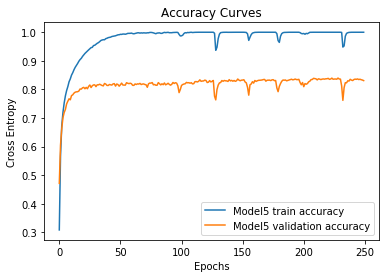

In [65]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historyb.history['accuracy'],label='Model5 train accuracy')
plt.plot(historyb.history['val_accuracy'],label='Model5 validation accuracy')
plt.legend()
plt.show()

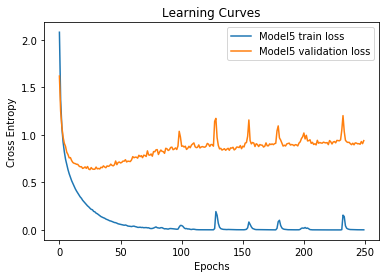

In [66]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historyb.history['loss'],label='Model5 train loss')
plt.plot(historyb.history['val_loss'],label='Model5 validation loss')
plt.legend()
plt.show()

#### Model6-Deep Neural Networks with Batch Normalization and Elu Activation

In [67]:
modelbe = Sequential()
modelbe.add(Dense(512, activation='elu', input_dim=input_size))
modelbe.add(BatchNormalization(momentum=0.0))
modelbe.add(Dense(512, activation='elu',kernel_initializer='he_normal'))
modelbe.add(BatchNormalization(momentum=0.0))
modelbe.add(Dense(512, activation='elu',kernel_initializer='he_normal'))
modelbe.add(BatchNormalization(momentum=0.0))
modelbe.add(Dense(num_classes, activation='softmax'))

In [68]:
modelbe.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

In [69]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.0001)
modelbe.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_listbe = [reduce_lr]

In [70]:
historybe=modelbe.fit(x_train, y_train,
          batch_size=512,
          epochs=250,validation_data=(x_val, y_val), callbacks=callback_listbe,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 4s 123us/step - loss: 2.0285 - accuracy: 0.3246 - val_loss: 1.6064 - val_accuracy: 0.4854
Epoch 2/250
30000/30000 [==============================] - 2s 80us/step - loss: 1.3867 - accuracy: 0.5853 - val_loss: 1.2461 - val_accuracy: 0.6280
Epoch 3/250
30000/30000 [==============================] - 2s 80us/step - loss: 1.1253 - accuracy: 0.6740 - val_loss: 1.0808 - val_accuracy: 0.6848
Epoch 4/250
30000/30000 [==============================] - 2s 79us/step - loss: 0.9850 - accuracy: 0.7211 - val_loss: 0.9984 - val_accuracy: 0.6990
Epoch 5/250
30000/30000 [==============================] - 2s 80us/step - loss: 0.8965 - accuracy: 0.7459 - val_loss: 0.9485 - val_accuracy: 0.7203
Epoch 6/250
30000/30000 [==============================] - 2s 81us/step - loss: 0.8292 - accuracy: 0.7649 - val_loss: 0.9007 - val_accuracy: 0.7358
Epoch 7/250
30000/30000 [==============================] - 2s

Epoch 56/250
30000/30000 [==============================] - 3s 88us/step - loss: 0.1574 - accuracy: 0.9592 - val_loss: 0.6154 - val_accuracy: 0.8383
Epoch 57/250
30000/30000 [==============================] - 3s 88us/step - loss: 0.1523 - accuracy: 0.9598 - val_loss: 0.6140 - val_accuracy: 0.8414
Epoch 58/250
30000/30000 [==============================] - 3s 88us/step - loss: 0.1467 - accuracy: 0.9629 - val_loss: 0.6929 - val_accuracy: 0.8148
Epoch 59/250
30000/30000 [==============================] - 3s 90us/step - loss: 0.1478 - accuracy: 0.9611 - val_loss: 0.7090 - val_accuracy: 0.8106
Epoch 60/250
30000/30000 [==============================] - 3s 88us/step - loss: 0.1441 - accuracy: 0.9634 - val_loss: 0.6388 - val_accuracy: 0.8334
Epoch 61/250
30000/30000 [==============================] - 3s 89us/step - loss: 0.1378 - accuracy: 0.9646 - val_loss: 0.6789 - val_accuracy: 0.8258
Epoch 62/250
30000/30000 [==============================] - 3s 89us/step - loss: 0.1327 - accuracy: 0.9665

Epoch 111/250
30000/30000 [==============================] - 3s 97us/step - loss: 0.0403 - accuracy: 0.9912 - val_loss: 0.7649 - val_accuracy: 0.8422
Epoch 112/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.0377 - accuracy: 0.9928 - val_loss: 0.8225 - val_accuracy: 0.8353
Epoch 113/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.0445 - accuracy: 0.9899 - val_loss: 0.7907 - val_accuracy: 0.8385
Epoch 114/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.0411 - accuracy: 0.9913 - val_loss: 0.8253 - val_accuracy: 0.8312
Epoch 115/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.0449 - accuracy: 0.9891 - val_loss: 0.7841 - val_accuracy: 0.8410
Epoch 116/250
30000/30000 [==============================] - 3s 98us/step - loss: 0.0393 - accuracy: 0.9912 - val_loss: 0.7931 - val_accuracy: 0.8375
Epoch 117/250
30000/30000 [==============================] - 3s 99us/step - loss: 0.0327 - accuracy:

30000/30000 [==============================] - 3s 105us/step - loss: 0.0209 - accuracy: 0.9951 - val_loss: 0.8794 - val_accuracy: 0.8434
Epoch 166/250
30000/30000 [==============================] - 3s 106us/step - loss: 0.0165 - accuracy: 0.9971 - val_loss: 0.9119 - val_accuracy: 0.8313
Epoch 167/250
30000/30000 [==============================] - 3s 105us/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.9218 - val_accuracy: 0.8346
Epoch 168/250
30000/30000 [==============================] - 3s 106us/step - loss: 0.0181 - accuracy: 0.9964 - val_loss: 0.9619 - val_accuracy: 0.8299
Epoch 169/250
30000/30000 [==============================] - 3s 106us/step - loss: 0.0186 - accuracy: 0.9958 - val_loss: 0.9269 - val_accuracy: 0.8382
Epoch 170/250
30000/30000 [==============================] - 3s 105us/step - loss: 0.0147 - accuracy: 0.9971 - val_loss: 0.9340 - val_accuracy: 0.8361
Epoch 171/250
30000/30000 [==============================] - 3s 106us/step - loss: 0.0158 - accuracy: 0.9970

30000/30000 [==============================] - 3s 114us/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.9466 - val_accuracy: 0.8443
Epoch 220/250
30000/30000 [==============================] - 3s 113us/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.9893 - val_accuracy: 0.8426
Epoch 221/250
30000/30000 [==============================] - 3s 114us/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.9646 - val_accuracy: 0.8429
Epoch 222/250
30000/30000 [==============================] - 3s 113us/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.9420 - val_accuracy: 0.8462
Epoch 223/250
30000/30000 [==============================] - 3s 113us/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.9686 - val_accuracy: 0.8450
Epoch 224/250
30000/30000 [==============================] - 3s 114us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.9849 - val_accuracy: 0.8428
Epoch 225/250
30000/30000 [==============================] - 3s 114us/step - loss: 0.0197 - accuracy: 0.9944

In [71]:
test_lossbe, test_accbe = modelbe.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accbe)


Test accuracy: 0.8397206664085388


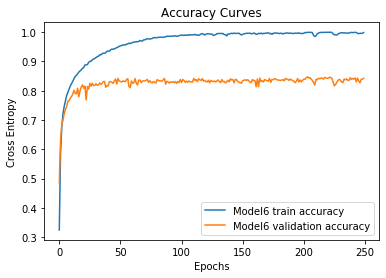

In [72]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historybe.history['accuracy'],label='Model6 train accuracy')
plt.plot(historybe.history['val_accuracy'],label='Model6 validation accuracy')
plt.legend()
plt.show()

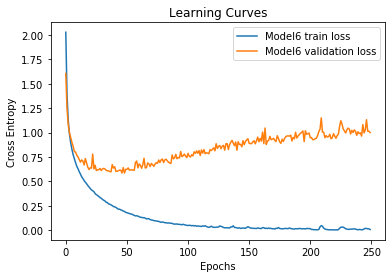

In [73]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historybe.history['loss'],label='Model6 train loss')
plt.plot(historybe.history['val_loss'],label='Model6 validation loss')
plt.legend()
plt.show()

#### Model7-Generalized Deep Neural Networks with Batch Normalization,Dropouts and Relu Activation

In [74]:
modelbd = Sequential()
modelbd.add(Dense(512, activation='relu', input_dim=input_size))
modelbd.add(BatchNormalization(momentum=0.0))
modelbd.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
modelbd.add(Dropout(0.10))
modelbd.add(BatchNormalization(momentum=0.0))
modelbd.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
modelbd.add(Dropout(0.10))
modelbd.add(BatchNormalization(momentum=0.0))
modelbd.add(Dense(num_classes, activation='softmax'))

In [75]:
modelbd.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)              

In [76]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.0001)
modelbd.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_listbd = [reduce_lr]

In [77]:
historybd=modelbd.fit(x_train, y_train,
          batch_size=512,
          epochs=250,validation_data=(x_val, y_val), callbacks=callback_listbd,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 5s 174us/step - loss: 2.3025 - accuracy: 0.2454 - val_loss: 1.6968 - val_accuracy: 0.4395
Epoch 2/250
30000/30000 [==============================] - 4s 121us/step - loss: 1.6181 - accuracy: 0.4655 - val_loss: 1.3049 - val_accuracy: 0.5899
Epoch 3/250
30000/30000 [==============================] - 4s 119us/step - loss: 1.2883 - accuracy: 0.5816 - val_loss: 1.1251 - val_accuracy: 0.6508
Epoch 4/250
30000/30000 [==============================] - 4s 121us/step - loss: 1.1024 - accuracy: 0.6521 - val_loss: 0.9906 - val_accuracy: 0.6942
Epoch 5/250
30000/30000 [==============================] - 4s 122us/step - loss: 0.9920 - accuracy: 0.6888 - val_loss: 0.9269 - val_accuracy: 0.7149
Epoch 6/250
30000/30000 [==============================] - 4s 122us/step - loss: 0.9063 - accuracy: 0.7165 - val_loss: 0.8661 - val_accuracy: 0.7346
Epoch 7/250
30000/30000 [==============================]

30000/30000 [==============================] - 4s 126us/step - loss: 0.1893 - accuracy: 0.9419 - val_loss: 0.5620 - val_accuracy: 0.8419
Epoch 56/250
30000/30000 [==============================] - 4s 126us/step - loss: 0.1860 - accuracy: 0.9431 - val_loss: 0.5916 - val_accuracy: 0.8354
Epoch 57/250
30000/30000 [==============================] - 4s 126us/step - loss: 0.1792 - accuracy: 0.9442 - val_loss: 0.5900 - val_accuracy: 0.8372
Epoch 58/250
30000/30000 [==============================] - 4s 126us/step - loss: 0.1784 - accuracy: 0.9444 - val_loss: 0.6157 - val_accuracy: 0.8313
Epoch 59/250
30000/30000 [==============================] - 4s 126us/step - loss: 0.1747 - accuracy: 0.9470 - val_loss: 0.6026 - val_accuracy: 0.8365
Epoch 60/250
30000/30000 [==============================] - 4s 126us/step - loss: 0.1692 - accuracy: 0.9474 - val_loss: 0.5940 - val_accuracy: 0.8387
Epoch 61/250
30000/30000 [==============================] - 4s 126us/step - loss: 0.1697 - accuracy: 0.9478 - val

30000/30000 [==============================] - 4s 136us/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.7003 - val_accuracy: 0.8412
Epoch 110/250
30000/30000 [==============================] - 4s 136us/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.6940 - val_accuracy: 0.8401
Epoch 111/250
30000/30000 [==============================] - 4s 138us/step - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.6884 - val_accuracy: 0.8372
Epoch 112/250
30000/30000 [==============================] - 4s 137us/step - loss: 0.0625 - accuracy: 0.9811 - val_loss: 0.7284 - val_accuracy: 0.8371
Epoch 113/250
30000/30000 [==============================] - 4s 137us/step - loss: 0.0598 - accuracy: 0.9826 - val_loss: 0.7150 - val_accuracy: 0.8338
Epoch 114/250
30000/30000 [==============================] - 4s 138us/step - loss: 0.0675 - accuracy: 0.9795 - val_loss: 0.7529 - val_accuracy: 0.8318
Epoch 115/250
30000/30000 [==============================] - 4s 137us/step - loss: 0.0632 - accuracy: 0.9803

30000/30000 [==============================] - 4s 146us/step - loss: 0.0327 - accuracy: 0.9905 - val_loss: 0.7684 - val_accuracy: 0.8399
Epoch 164/250
30000/30000 [==============================] - 4s 146us/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.7675 - val_accuracy: 0.8400
Epoch 165/250
30000/30000 [==============================] - 4s 146us/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.7636 - val_accuracy: 0.8419
Epoch 166/250
30000/30000 [==============================] - 4s 146us/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.7679 - val_accuracy: 0.8396
Epoch 167/250
30000/30000 [==============================] - 4s 147us/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.8037 - val_accuracy: 0.8367
Epoch 168/250
30000/30000 [==============================] - 4s 147us/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.8020 - val_accuracy: 0.8355
Epoch 169/250
30000/30000 [==============================] - 5s 153us/step - loss: 0.0441 - accuracy: 0.9857

30000/30000 [==============================] - 5s 155us/step - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.8208 - val_accuracy: 0.8448
Epoch 218/250
30000/30000 [==============================] - 5s 155us/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.8196 - val_accuracy: 0.8424
Epoch 219/250
30000/30000 [==============================] - 5s 156us/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.8360 - val_accuracy: 0.8445
Epoch 220/250
30000/30000 [==============================] - 5s 155us/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.8393 - val_accuracy: 0.8411
Epoch 221/250
30000/30000 [==============================] - 5s 155us/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.8077 - val_accuracy: 0.8450
Epoch 222/250
30000/30000 [==============================] - 5s 157us/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.8411 - val_accuracy: 0.8418
Epoch 223/250
30000/30000 [==============================] - 5s 156us/step - loss: 0.0249 - accuracy: 0.9924

In [78]:
test_lossbd, test_accbd = modelbd.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accbd)


Test accuracy: 0.8494971990585327


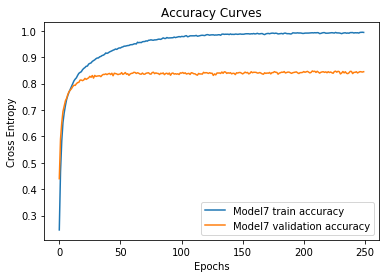

In [79]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historybd.history['accuracy'],label='Model7 train accuracy')
plt.plot(historybd.history['val_accuracy'],label='Model7 validation accuracy')
plt.legend()
plt.show()

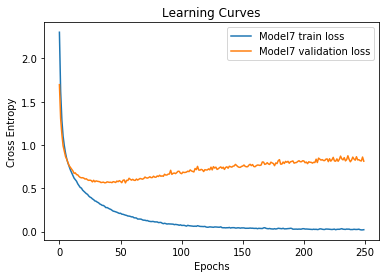

In [80]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historybd.history['loss'],label='Model7 train loss')
plt.plot(historybd.history['val_loss'],label='Model7 validation loss')
plt.legend()
plt.show()

#### Model8-Generalized Deep Neural Networks with Batch Normalization,Dropouts and Elu Activation

In [81]:
modelbde = Sequential()
modelbde.add(Dense(512, activation='elu', input_dim=input_size))
modelbde.add(BatchNormalization(momentum=0.0))
modelbde.add(Dense(512, activation='elu',kernel_initializer='he_normal'))
modelbde.add(Dropout(0.10))
modelbde.add(BatchNormalization(momentum=0.0))
modelbde.add(Dense(512, activation='elu',kernel_initializer='he_normal'))
modelbde.add(Dropout(0.10))
modelbde.add(BatchNormalization(momentum=0.0))
modelbde.add(Dense(num_classes, activation='softmax'))

In [82]:
modelbde.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)              

In [83]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.0001)
modelbde.compile(optimizer=optimizer,
              loss=categorical_crossentropy,
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_listbde = [reduce_lr]

In [84]:
historybde=modelbde.fit(x_train, y_train,
          batch_size=512,
          epochs=250,validation_data=(x_val, y_val), callbacks=callback_listbde,verbose=1)

Train on 30000 samples, validate on 12000 samples
Epoch 1/250
30000/30000 [==============================] - 6s 215us/step - loss: 2.2895 - accuracy: 0.2228 - val_loss: 1.7177 - val_accuracy: 0.4523
Epoch 2/250
30000/30000 [==============================] - 5s 155us/step - loss: 1.6330 - accuracy: 0.4596 - val_loss: 1.3426 - val_accuracy: 0.5869
Epoch 3/250
30000/30000 [==============================] - 5s 162us/step - loss: 1.3126 - accuracy: 0.5864 - val_loss: 1.1456 - val_accuracy: 0.6607
Epoch 4/250
30000/30000 [==============================] - 5s 167us/step - loss: 1.1377 - accuracy: 0.6519 - val_loss: 1.0510 - val_accuracy: 0.6871
Epoch 5/250
30000/30000 [==============================] - 5s 162us/step - loss: 1.0336 - accuracy: 0.6880 - val_loss: 0.9648 - val_accuracy: 0.7118
Epoch 6/250
30000/30000 [==============================] - 5s 163us/step - loss: 0.9623 - accuracy: 0.7117 - val_loss: 0.9375 - val_accuracy: 0.7309
Epoch 7/250
30000/30000 [==============================]

30000/30000 [==============================] - 5s 163us/step - loss: 0.3136 - accuracy: 0.9054 - val_loss: 0.5664 - val_accuracy: 0.8417
Epoch 56/250
30000/30000 [==============================] - 5s 164us/step - loss: 0.3067 - accuracy: 0.9076 - val_loss: 0.5455 - val_accuracy: 0.8445
Epoch 57/250
30000/30000 [==============================] - 5s 163us/step - loss: 0.3081 - accuracy: 0.9063 - val_loss: 0.5510 - val_accuracy: 0.8490
Epoch 58/250
30000/30000 [==============================] - 5s 164us/step - loss: 0.3040 - accuracy: 0.9062 - val_loss: 0.5478 - val_accuracy: 0.8477
Epoch 59/250
30000/30000 [==============================] - 5s 164us/step - loss: 0.2973 - accuracy: 0.9089 - val_loss: 0.5759 - val_accuracy: 0.8407
Epoch 60/250
30000/30000 [==============================] - 5s 165us/step - loss: 0.2939 - accuracy: 0.9101 - val_loss: 0.5650 - val_accuracy: 0.8447
Epoch 61/250
30000/30000 [==============================] - 5s 165us/step - loss: 0.2921 - accuracy: 0.9104 - val

30000/30000 [==============================] - 5s 172us/step - loss: 0.1643 - accuracy: 0.9475 - val_loss: 0.6155 - val_accuracy: 0.8454
Epoch 110/250
30000/30000 [==============================] - 5s 173us/step - loss: 0.1645 - accuracy: 0.9467 - val_loss: 0.6170 - val_accuracy: 0.8474
Epoch 111/250
30000/30000 [==============================] - 5s 174us/step - loss: 0.1591 - accuracy: 0.9485 - val_loss: 0.5727 - val_accuracy: 0.8563
Epoch 112/250
30000/30000 [==============================] - 5s 174us/step - loss: 0.1597 - accuracy: 0.9483 - val_loss: 0.6112 - val_accuracy: 0.8517
Epoch 113/250
30000/30000 [==============================] - 5s 174us/step - loss: 0.1559 - accuracy: 0.9513 - val_loss: 0.6300 - val_accuracy: 0.8460
Epoch 114/250
30000/30000 [==============================] - 5s 175us/step - loss: 0.1540 - accuracy: 0.9503 - val_loss: 0.6227 - val_accuracy: 0.8471
Epoch 115/250
30000/30000 [==============================] - 5s 174us/step - loss: 0.1532 - accuracy: 0.9505

30000/30000 [==============================] - 6s 194us/step - loss: 0.0997 - accuracy: 0.9672 - val_loss: 0.6315 - val_accuracy: 0.8539
Epoch 164/250
30000/30000 [==============================] - 6s 187us/step - loss: 0.1026 - accuracy: 0.9676 - val_loss: 0.6317 - val_accuracy: 0.8620
Epoch 165/250
30000/30000 [==============================] - 6s 192us/step - loss: 0.0974 - accuracy: 0.9693 - val_loss: 0.6277 - val_accuracy: 0.8568
Epoch 166/250
30000/30000 [==============================] - 6s 188us/step - loss: 0.0984 - accuracy: 0.9678 - val_loss: 0.6546 - val_accuracy: 0.8557
Epoch 167/250
30000/30000 [==============================] - 6s 189us/step - loss: 0.0930 - accuracy: 0.9688 - val_loss: 0.6648 - val_accuracy: 0.8511
Epoch 168/250
30000/30000 [==============================] - 6s 188us/step - loss: 0.0973 - accuracy: 0.9687 - val_loss: 0.6385 - val_accuracy: 0.8528
Epoch 169/250
30000/30000 [==============================] - 6s 189us/step - loss: 0.0933 - accuracy: 0.9692

30000/30000 [==============================] - 6s 203us/step - loss: 0.0681 - accuracy: 0.9785 - val_loss: 0.7075 - val_accuracy: 0.8565
Epoch 218/250
30000/30000 [==============================] - 6s 203us/step - loss: 0.0665 - accuracy: 0.9784 - val_loss: 0.6960 - val_accuracy: 0.8547
Epoch 219/250
30000/30000 [==============================] - 6s 207us/step - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.7056 - val_accuracy: 0.8572
Epoch 220/250
30000/30000 [==============================] - 6s 203us/step - loss: 0.0644 - accuracy: 0.9783 - val_loss: 0.7294 - val_accuracy: 0.8476
Epoch 221/250
30000/30000 [==============================] - 6s 205us/step - loss: 0.0666 - accuracy: 0.9788 - val_loss: 0.7205 - val_accuracy: 0.8526
Epoch 222/250
30000/30000 [==============================] - 6s 204us/step - loss: 0.0636 - accuracy: 0.9797 - val_loss: 0.7138 - val_accuracy: 0.8502
Epoch 223/250
30000/30000 [==============================] - 6s 205us/step - loss: 0.0627 - accuracy: 0.9800

In [85]:
test_lossbde, test_accbde = modelbde.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accbde)


Test accuracy: 0.8575419187545776


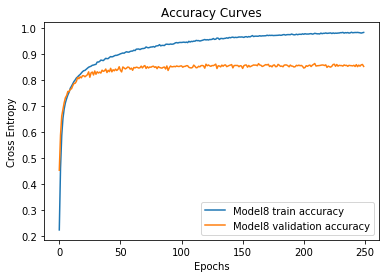

In [86]:
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historybde.history['accuracy'],label='Model8 train accuracy')
plt.plot(historybde.history['val_accuracy'],label='Model8 validation accuracy')
plt.legend()
plt.show()

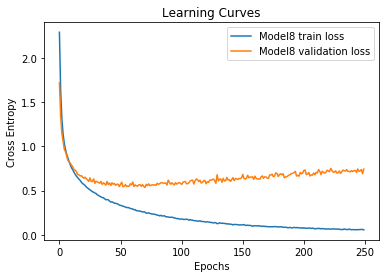

In [87]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(historybde.history['loss'],label='Model8 train loss')
plt.plot(historybde.history['val_loss'],label='Model8 validation loss')
plt.legend()
plt.show()

### Model Comparison

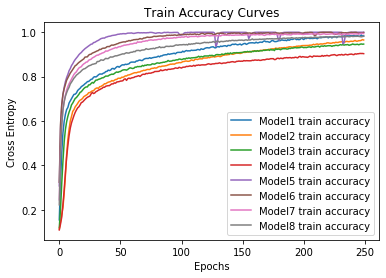

In [90]:
plt.title("Train Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['accuracy'],label='Model1 train accuracy')
plt.plot(historye.history['accuracy'],label='Model2 train accuracy')
plt.plot(historyd.history['accuracy'],label='Model3 train accuracy')
plt.plot(historyde.history['accuracy'],label='Model4 train accuracy')
plt.plot(historyb.history['accuracy'],label='Model5 train accuracy')
plt.plot(historybe.history['accuracy'],label='Model6 train accuracy')
plt.plot(historybd.history['accuracy'],label='Model7 train accuracy')
plt.plot(historybde.history['accuracy'],label='Model8 train accuracy')
plt.legend()
plt.show()

#### Most overfitting model is model 5 and the best generalized model is model 4.

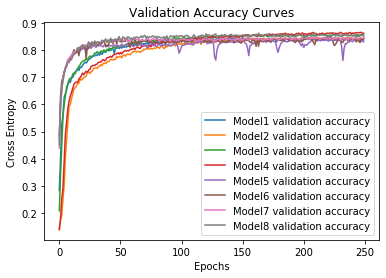

In [91]:
plt.title("Validation Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['val_accuracy'],label='Model1 validation accuracy')
plt.plot(historye.history['val_accuracy'],label='Model2 validation accuracy')
plt.plot(historyd.history['val_accuracy'],label='Model3 validation accuracy')
plt.plot(historyde.history['val_accuracy'],label='Model4 validation accuracy')
plt.plot(historyb.history['val_accuracy'],label='Model5 validation accuracy')
plt.plot(historybe.history['val_accuracy'],label='Model6 validation accuracy')
plt.plot(historybd.history['val_accuracy'],label='Model7 validation accuracy')
plt.plot(historybde.history['val_accuracy'],label='Model8 validation accuracy')
plt.legend()
plt.show()

### It can be seen that Model4 and Model 8 are the best in terms of generalization and Accuracy. So, lets evaluate both these models on test set and predict using the model that has the higest accuracy on test set classification in terms of recall and F1 score.

## 5.Print the classification accuracy metrics 

## Prediction on the prediction dataset using best model

In [156]:
from sklearn.metrics import classification_report, confusion_matrix

In [157]:
pred_Model8=modelbde.predict(x_train)

In [158]:
for i in range(1,(x_train.shape[0] + 1)):
    pred_Model8[i-1] = np.argmax(pred_Model8[i-1])
pred_M8_train_labels=pred_Model8[:,1]

In [159]:
print(pred_M8_train_labels.shape)
print(pred_M8_train_labels)

(30000,)
[2. 6. 7. ... 8. 5. 1.]


In [160]:
pred_Model4=modelde.predict(x_train)

In [161]:
for i in range(1,(x_train.shape[0] + 1)):
    pred_Model4[i-1] = np.argmax(pred_Model4[i-1])
pred_M4_train_labels=pred_Model4[:,1]

In [162]:
print(pred_M4_train_labels.shape)
print(pred_M4_train_labels)

(30000,)
[2. 5. 7. ... 8. 5. 1.]


In [166]:
pred_model8_test=modelbde.predict(x_test)

In [167]:
for i in range(1,(x_test.shape[0] + 1)):
    pred_model8_test[i-1] = np.argmax(pred_model8_test[i-1])
pred_M8_test_labels=pred_model8_test[:,1]

In [168]:
print(pred_M8_test_labels.shape)
print(pred_M8_test_labels)

(17900,)
[1. 7. 2. ... 1. 9. 1.]


In [169]:
pred_model4_test=modelbe.predict(x_test)

In [170]:
for i in range(1,(x_test.shape[0] + 1)):
    pred_model4_test[i-1] = np.argmax(pred_model4_test[i-1])
pred_M4_test_labels=pred_model4_test[:,1]

In [171]:
print(pred_M4_test_labels.shape)
print(pred_M4_test_labels)

(17900,)
[1. 7. 2. ... 1. 9. 2.]


### Confusion and Classification matrix

### For Model4

In [172]:
cm4 = confusion_matrix(y_test_labels,pred_M4_test_labels,labels=[0,1,2,3,4,5,6,7,8,9])
print(cm4)

[[1512   29   23   32   21   12   51   21   33   69]
 [  19 1530   42   41   38   12   26   56   22   22]
 [  13   18 1559   35   22   13   12   55   21   45]
 [  17   24   42 1393    6   97   31   30   40   26]
 [  19   50   35   29 1528   19   46   14   18   46]
 [  11   11   18   92    8 1475   69   13   32   31]
 [  32   16   23   23   26   81 1516   10   69   28]
 [  12   55   47   18   12   13   19 1596   12   20]
 [  21   39   32   68   12   43   95   14 1411   71]
 [  43   31   37   36    9   48   23   20   34 1511]]


In [173]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test_labels, pred_M4_test_labels,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.84      0.86      1803
     class 1       0.85      0.85      0.85      1808
     class 2       0.84      0.87      0.85      1793
     class 3       0.79      0.82      0.80      1706
     class 4       0.91      0.85      0.88      1804
     class 5       0.81      0.84      0.83      1760
     class 6       0.80      0.83      0.82      1824
     class 7       0.87      0.88      0.88      1804
     class 8       0.83      0.78      0.81      1806
     class 9       0.81      0.84      0.83      1792

    accuracy                           0.84     17900
   macro avg       0.84      0.84      0.84     17900
weighted avg       0.84      0.84      0.84     17900



### For Model8

In [174]:
cm8 = confusion_matrix(y_test_labels,pred_M8_test_labels,labels=[0,1,2,3,4,5,6,7,8,9])
print(cm8)

[[1630   35   10   21   20    0   19   20   18   30]
 [  20 1612   18   31   42    4    8   49   12   12]
 [  15   35 1570   34   23   12    3   58   16   27]
 [  28   39   32 1427   14   49   19   35   42   21]
 [  25   65   24   29 1578    6   20   14   19   24]
 [  16   25   12  118   21 1420   63   16   37   32]
 [  62   31   12   28   36   53 1512   13   63   14]
 [  19   60   18   21   14    4    4 1642   13    9]
 [  32   46   25   83   17   14   52   17 1479   41]
 [  78   35   30   54   25   24    8   24   34 1480]]


In [175]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test_labels, pred_M8_test_labels,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.90      0.87      1803
     class 1       0.81      0.89      0.85      1808
     class 2       0.90      0.88      0.89      1793
     class 3       0.77      0.84      0.80      1706
     class 4       0.88      0.87      0.88      1804
     class 5       0.90      0.81      0.85      1760
     class 6       0.89      0.83      0.86      1824
     class 7       0.87      0.91      0.89      1804
     class 8       0.85      0.82      0.84      1806
     class 9       0.88      0.83      0.85      1792

    accuracy                           0.86     17900
   macro avg       0.86      0.86      0.86     17900
weighted avg       0.86      0.86      0.86     17900



### As per the classification reports, although the Model4(generalized Neural Network model) accuracy was better than Model8(generalized neura; networks model with batch normalization). Model8 performs better than model 4 in terms of prediction,recall and F1 score on the test dataset. Model 8 accuracy is 2 % more than that of Model 4 and it fares well in all other scores too. Therefore, we will use Model 8 for predictions on the predictions dataset.

## Visualizing Predictions

In [177]:
predictions=modelbde.predict(x_pred)
for i in range(1,101):
    predictions[i-1] = np.argmax(predictions[i-1])
    pred_labels=predictions[:,1]
print(y_pred.shape)

(100,)


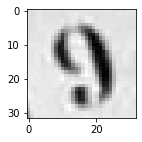

Peredicted Labels: 9.0
True lable: 9


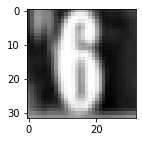

Peredicted Labels: 6.0
True lable: 6


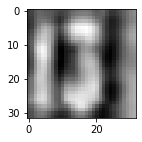

Peredicted Labels: 3.0
True lable: 3


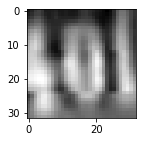

Peredicted Labels: 0.0
True lable: 0


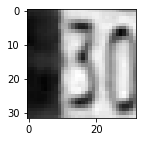

Peredicted Labels: 3.0
True lable: 3


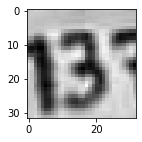

Peredicted Labels: 3.0
True lable: 3


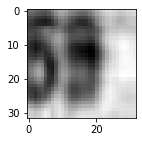

Peredicted Labels: 9.0
True lable: 9


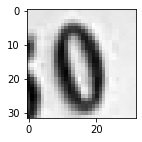

Peredicted Labels: 0.0
True lable: 0


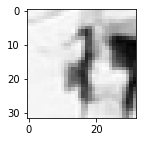

Peredicted Labels: 7.0
True lable: 1


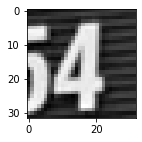

Peredicted Labels: 4.0
True lable: 4


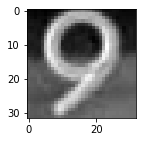

Peredicted Labels: 9.0
True lable: 9


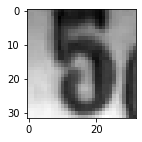

Peredicted Labels: 5.0
True lable: 5


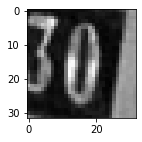

Peredicted Labels: 0.0
True lable: 0


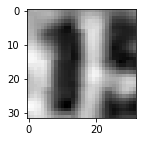

Peredicted Labels: 1.0
True lable: 1


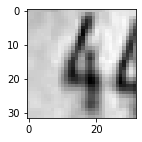

Peredicted Labels: 4.0
True lable: 4


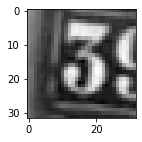

Peredicted Labels: 3.0
True lable: 3


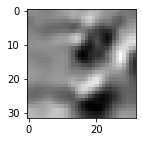

Peredicted Labels: 5.0
True lable: 3


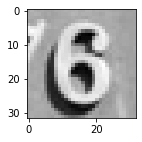

Peredicted Labels: 6.0
True lable: 6


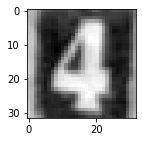

Peredicted Labels: 4.0
True lable: 4


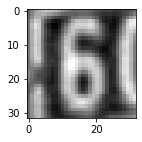

Peredicted Labels: 6.0
True lable: 6


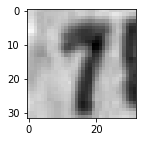

Peredicted Labels: 7.0
True lable: 7


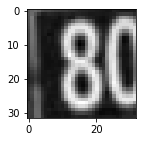

Peredicted Labels: 8.0
True lable: 8


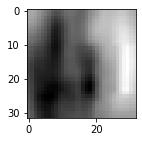

Peredicted Labels: 5.0
True lable: 5


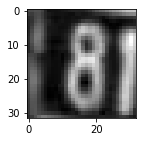

Peredicted Labels: 8.0
True lable: 8


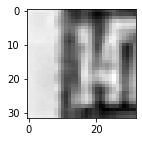

Peredicted Labels: 1.0
True lable: 1


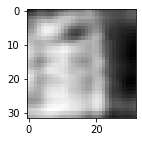

Peredicted Labels: 3.0
True lable: 1


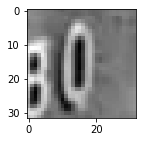

Peredicted Labels: 0.0
True lable: 0


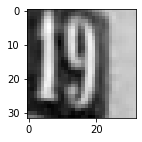

Peredicted Labels: 9.0
True lable: 9


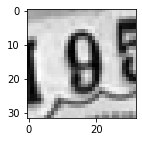

Peredicted Labels: 0.0
True lable: 9


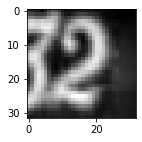

Peredicted Labels: 2.0
True lable: 2


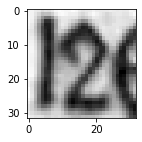

Peredicted Labels: 2.0
True lable: 2


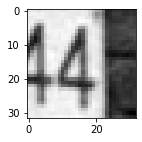

Peredicted Labels: 4.0
True lable: 4


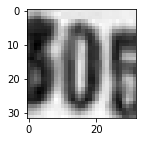

Peredicted Labels: 0.0
True lable: 0


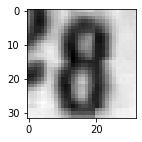

Peredicted Labels: 8.0
True lable: 8


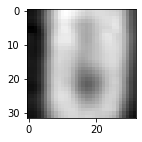

Peredicted Labels: 4.0
True lable: 4


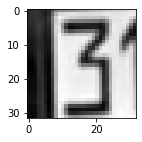

Peredicted Labels: 3.0
True lable: 3


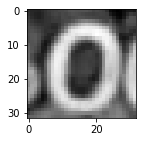

Peredicted Labels: 0.0
True lable: 0


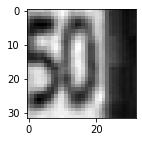

Peredicted Labels: 0.0
True lable: 0


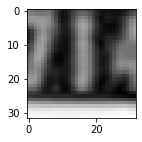

Peredicted Labels: 1.0
True lable: 1


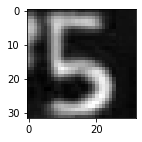

Peredicted Labels: 5.0
True lable: 5


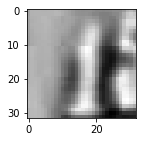

Peredicted Labels: 1.0
True lable: 1


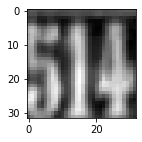

Peredicted Labels: 1.0
True lable: 1


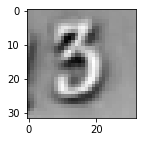

Peredicted Labels: 3.0
True lable: 3


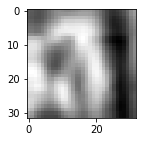

Peredicted Labels: 3.0
True lable: 3


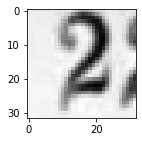

Peredicted Labels: 2.0
True lable: 2


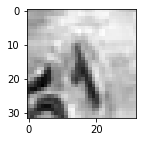

Peredicted Labels: 4.0
True lable: 1


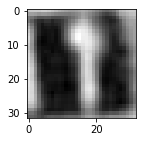

Peredicted Labels: 1.0
True lable: 1


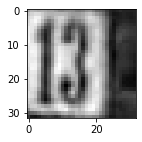

Peredicted Labels: 3.0
True lable: 3


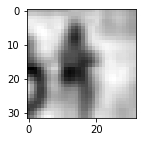

Peredicted Labels: 4.0
True lable: 4


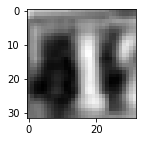

Peredicted Labels: 1.0
True lable: 1


In [178]:
for i in range(1, 50 +1):
  plt.figure(figsize=(2,2))
  plt.imshow(pred_image[i],cmap="gray")
  plt.show()
  print('Peredicted Labels:',pred_labels[i])
  print('True lable:',y_pred[i])


In [179]:
cm_pred = confusion_matrix(y_pred_labels,pred_labels,labels=[0,1,2,3,4,5,6,7,8,9])
print(cm_pred)

[[11  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  1  1  0  0  1  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  1  0  0  0  0]
 [ 0  1  0  0  7  0  0  0  0  0]
 [ 0  0  0  1  0  6  1  0  0  0]
 [ 0  0  0  0  0  1  6  0  1  0]
 [ 0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 1  0  0  0  0  0  0  0  0 11]]


In [180]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_pred_labels,pred_labels,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      1.00      0.96        11
     class 1       0.94      0.85      0.89        20
     class 2       1.00      1.00      1.00        10
     class 3       0.86      0.92      0.89        13
     class 4       0.88      0.88      0.88         8
     class 5       0.75      0.75      0.75         8
     class 6       0.86      0.75      0.80         8
     class 7       0.80      1.00      0.89         4
     class 8       0.86      1.00      0.92         6
     class 9       1.00      0.92      0.96        12

    accuracy                           0.90       100
   macro avg       0.89      0.91      0.89       100
weighted avg       0.90      0.90      0.90       100



### Model8 performs exceptionally well on the unseen data which means it generalized well. This generalized batch normalized model with drop outs.

### Conclusion: Although Model 4 with Dropouts performed well in the given epochs, the best model turned out to be the generalized Batch Normalized model i.e. Model8. It performs well on both test dataset and unseen prediction dataset with an accuracy of 86% and 90% respectively.Therefore, it can be concluded that Batch Normalization on this model has helped to generalize and boost the overall accuracy score. 